In [ ]:
from langgraph.graph import StateGraph,START,END
from langchain_groq import ChatGroq
from typing import TypedDict
from dotenv import load_dotenv

load_dotenv()

model=ChatGroq(
    model="llama-3.3-70b-versatile",
    temperature=0,
    max_retries=2)


class BatsmanState(TypedDict):

    runs: int
    balls: int
    fours: int
    sixes: int

    sr: float
    bpb: float
    boundary_percent: float
    summary: str


 
def calculate_sr(state: BatsmanState):

    sr = (state['runs']/state['balls'])*100
    return {'sr': sr}

    
def calculate_bpb(state: BatsmanState):

    bpb = state['balls']/(state['fours'] + state['sixes'])
    return {'bpb': bpb}


def calculate_boundary_percent(state: BatsmanState):

    boundary_percent = (((state['fours'] * 4) + (state['sixes'] * 6))/state['runs'])*100
    return {'boundary_percent': boundary_percent}


def summary(state: BatsmanState):

    summary = f"""
Strike Rate - {state['sr']} \n
Balls per boundary - {state['bpb']} \n
Boundary percent - {state['boundary_percent']}
"""
    return {'summary': summary}


graph= StateGraph(BatsmanState)

graph.add_node('calculate_sr',calculate_sr)
graph.add_node('calculate_bpb',calculate_bpb)
graph.add_node('calculate_boundary_percent',calculate_boundary_percent)
graph.add_node('summary',summary)

graph.add_edge(START,'calculate_sr')
graph.add_edge(START,'calculate_boundary_percent')
graph.add_edge(START,'calculate_bpb')

graph.add_edge('calculate_sr','summary')
graph.add_edge('calculate_boundary_percent','summary')
graph.add_edge('calculate_bpb','summary')
graph.add_edge('summary',END)

workflow = graph.compile()


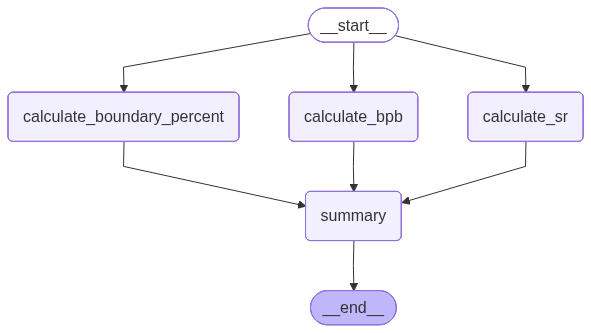

In [22]:
workflow

In [25]:
initial_state= {
    'runs': 100,
    'balls':50,
    'fours': 6,
    'sixes': 4
}
workflow.invoke(initial_state)
# print(final_state)

{'runs': 100,
 'balls': 50,
 'fours': 6,
 'sixes': 4,
 'sr': 200.0,
 'bpb': 5.0,
 'boundary_percent': 48.0,
 'summary': '\nStrike Rate - 200.0 \n\nBalls per boundary - 5.0 \n\nBoundary percent - 48.0\n'}